## Decision Tree- Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
df=pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [3]:
df.shape

(15915, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.isnull().any()

make_model             False
body_type              False
price                  False
vat                    False
km                     False
Type                   False
Fuel                   False
Gears                  False
Comfort_Convenience    False
Entertainment_Media    False
Extras                 False
Safety_Security        False
age                    False
Previous_Owners        False
hp_kW                  False
Inspection_new         False
Paint_Type             False
Upholstery_type        False
Gearing_Type           False
Displacement_cc        False
Weight_kg              False
Drive_chain            False
cons_comb              False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


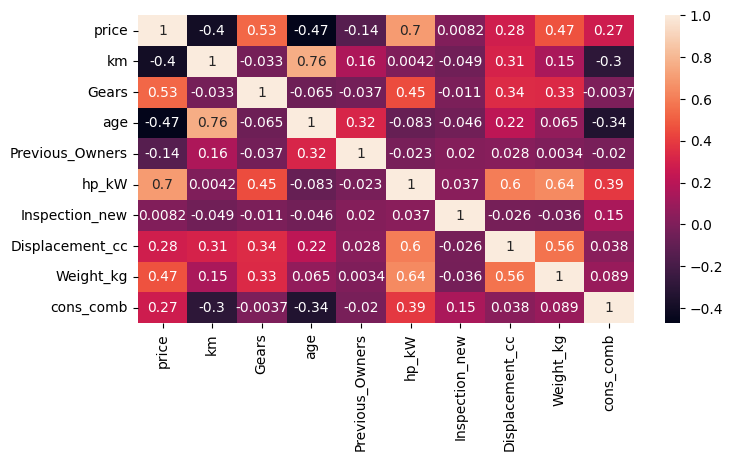

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [10]:
df.select_dtypes("object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [11]:
for i in df.select_dtypes("object"):

    print(i, len(df[i].value_counts()))

make_model 9
body_type 8
vat 2
Type 5
Fuel 4
Comfort_Convenience 6196
Entertainment_Media 346
Extras 659
Safety_Security 4442
Paint_Type 3
Upholstery_type 2
Gearing_Type 3
Drive_chain 3


In [15]:
print("Number of Uniques:\n", df.select_dtypes('object').nunique(),'\n', sep='')

Number of Uniques:
make_model                9
body_type                 8
vat                       2
Type                      5
Fuel                      4
Comfort_Convenience    6196
Entertainment_Media     346
Extras                  659
Safety_Security        4442
Paint_Type                3
Upholstery_type           2
Gearing_Type              3
Drive_chain               3
dtype: int64



<AxesSubplot: xlabel='price', ylabel='Count'>

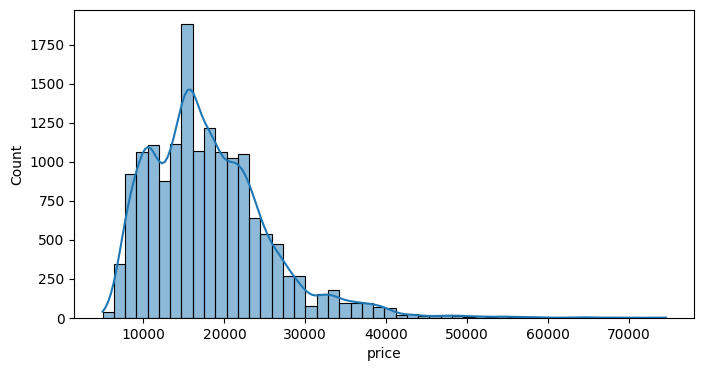

In [16]:
sns.histplot(df.price, bins=50, kde=True)

# tree based modeller outlierlara karşı çok robustdur(güçlüdür). Ancak küçük regression datalarında bu durum geçerli değildir.
# Küçük regression datalarında outlier dağerler düştüğü yapraklardaki ortalama fiyatları ciddi şekilde yükseltebiliğinden veya 
# azaltabildiğinden eğitim için yetersiz olan bu outlier gözlemleri düşürmek tree based modellerde önem arzediyor.

# Ancak her zaman olduğu gibi hem outlierlar ile hem de outlierları düşürerek skorları karşılaştırıp farklarını görmeliyiz.

<AxesSubplot: >

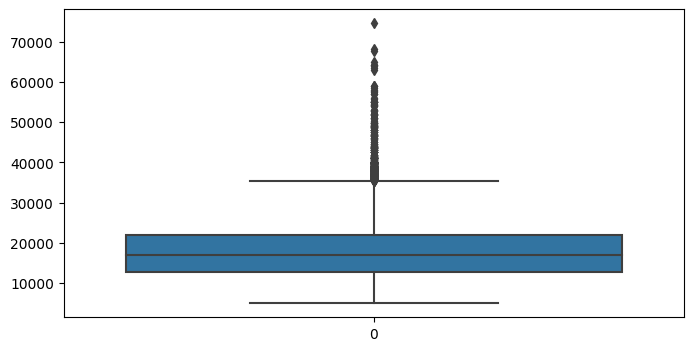

In [18]:
sns.boxplot(df.price)

In [18]:
df2 = df.copy()

In [19]:
pd.DataFrame(df.select_dtypes('number').agg(['min', 'max']))

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
min,4950,0.0,5.0,0.0,0.0,40.0,0,890.0,840.0,3.0
max,74600,317000.0,8.0,3.0,4.0,294.0,1,2967.0,2471.0,9.1


In [20]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [21]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [22]:
df.drop(index=[2614], inplace =True)

In [23]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [24]:
new_list=["age", "hp_kW", "km", "Gearing_Type", 'make_model']

## Train test split

In [25]:
X=df[new_list]
y=df['price']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12731, 5)
Train target shape   :  (12731,)
Test features shape  :  (3183, 5)
Test target shape    :  (3183,)


## OrdinalEncoder and Categoric Variable

In [27]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gearing_Type', 'make_model'], dtype='object')

In [28]:
X_train[cat]

,Gearing_Type,make_model
15426,Automatic,Renault Espace
8762,Manual,Opel Corsa
9397,Manual,Opel Corsa
10961,Manual,Opel Insignia
11405,Automatic,Opel Insignia
...,...,...
3047,Manual,Audi A3
9918,Automatic,Opel Corsa
4080,Manual,Audi A3
2254,Manual,Audi A1


In [29]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit_transform(X_train[cat])

array([[0., 7.],
       [1., 3.],
       [1., 3.],
       ...,
       [1., 1.],
       [1., 0.],
       [0., 1.]])

In [30]:
X_train[cat] = enc.fit_transform(X_train[cat])

In [31]:
X_train.head()

,age,hp_kW,km,Gearing_Type,make_model
15426,1.0,118.0,18035.130067,0.0,7.0
8762,3.0,51.0,96800.000000,1.0,3.0
9397,2.0,66.0,35427.000000,1.0,3.0
10961,2.0,100.0,93165.000000,1.0,4.0
11405,2.0,100.0,30000.000000,0.0,4.0


In [32]:
X_test[cat]=enc.transform(X_test[cat])

In [33]:
X_test.head()

,age,hp_kW,km,Gearing_Type,make_model
13664,3.0,65.0,162960.000000,1.0,5.0
14105,0.0,56.0,1647.362609,1.0,5.0
9468,2.0,66.0,52000.000000,1.0,3.0
3527,3.0,81.0,55000.000000,1.0,1.0
6699,1.0,100.0,10000.000000,0.0,2.0


## Modeling with Pipeline

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [35]:
X_train.head(2)

,age,hp_kW,km,Gearing_Type,make_model
15426,1.0,118.0,18035.130067,Automatic,Renault Espace
8762,3.0,51.0,96800.000000,Manual,Opel Corsa


In [36]:
X_test.head(2)

,age,hp_kW,km,Gearing_Type,make_model
13664,3.0,65.0,162960.000000,Manual,Renault Clio
14105,0.0,56.0,1647.362609,Manual,Renault Clio


In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

# classification notebokunda yaptığımız işlemleri aynen tekrarlıyoruz.#

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gearing_Type', 'make_model'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [41]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfiting olduğuna dair insightımızı aldık. CV'da kesin kararımızı vereceğiz.

,train,test
R2,9.799361e-01,9.065788e-01
mae,3.317592e+02,1.262153e+03
mse,1.102565e+06,4.914032e+06
rmse,1.050031e+03,2.216762e+03


In [43]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# overfiting olduğunu teyit ettik

test_r2                              9.035614e-01
train_r2                             9.803480e-01
test_neg_mean_absolute_error        -1.305582e+03
train_neg_mean_absolute_error       -3.245771e+02
test_neg_mean_squared_error         -5.280542e+06
train_neg_mean_squared_error        -1.079881e+06
test_neg_root_mean_squared_error    -2.294308e+03
train_neg_root_mean_squared_error   -1.039050e+03
dtype: float64

In [46]:
pip install yellowbrick


  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


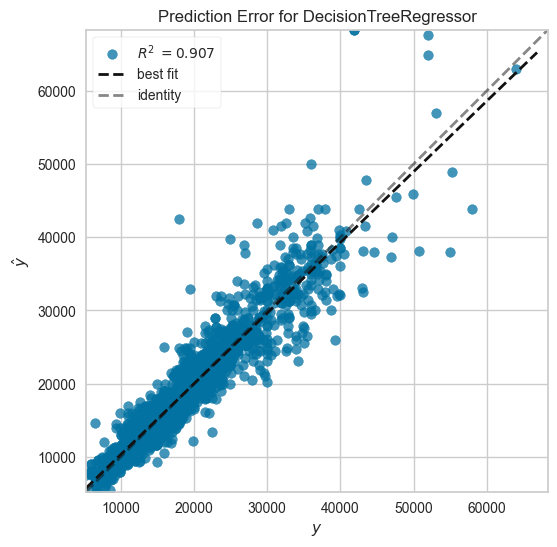

In [48]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();



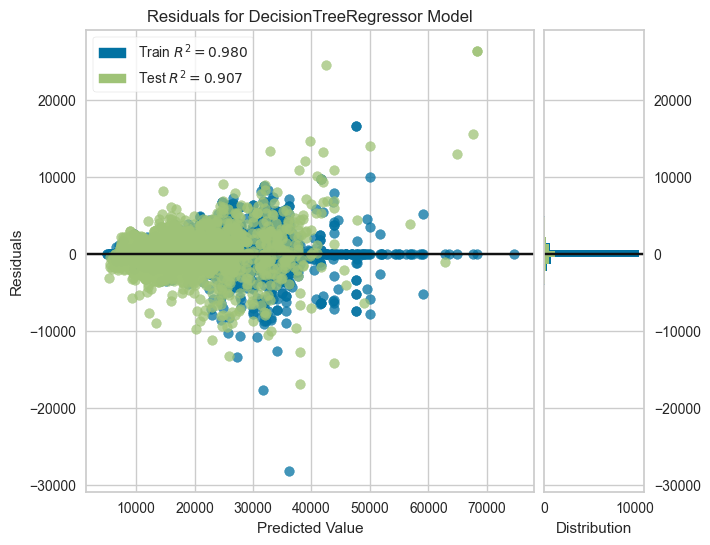

In [49]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(720, 600))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();       

## Visualizing trees

In [50]:
from sklearn.tree import plot_tree

In [51]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

# pipeline içerisinde make_column_transform fonksiyonu kullanıldığından feature sırlamasının değiştiğini unutmuyoruz.

array(['ordinalencoder__Gearing_Type', 'ordinalencoder__make_model',
       'remainder__age', 'remainder__hp_kW', 'remainder__km'],
      dtype=object)

In [52]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

# ordinalencoder__ ve remainder__ ön eklerinden kurtuluyoruz.

['Gearing_Type', 'make_model', 'age', 'hp_kW', 'km']

In [53]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=new_features)

# make_column_transform sonrası yapısı değişen df'in son hali. Gördüğünüz gibi kategorik featurlar en öne takiben numaric
# featurlar gelmiş.

,Gearing_Type,make_model,age,hp_kW,km
0,0.0,7.0,1.0,118.0,18035.130067
1,1.0,3.0,3.0,51.0,96800.000000
2,1.0,3.0,2.0,66.0,35427.000000
3,1.0,4.0,2.0,100.0,93165.000000
4,0.0,4.0,2.0,100.0,30000.000000
...,...,...,...,...,...
12726,1.0,1.0,3.0,81.0,123226.000000
12727,0.0,3.0,0.0,66.0,10.000000
12728,1.0,1.0,1.0,85.0,22102.000000
12729,1.0,0.0,0.0,85.0,1.000000


In [54]:
X_train.head(1)

,age,hp_kW,km,Gearing_Type,make_model
15426,1.0,118.0,18035.130067,Automatic,Renault Espace


In [56]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"],filled=True, feature_names=new_features, fontsize=8); #feature_names=X.columns

# Bu fonksiyon ile train ve test seti skorlarını karşılaştırıp ağacımızı görselleştiriyoruz.



             train          test
R2    7.091500e-01  7.099478e-01
mae   2.880077e+03  2.852356e+03
mse   1.598301e+07  1.525698e+07
rmse  3.997875e+03  3.906019e+03




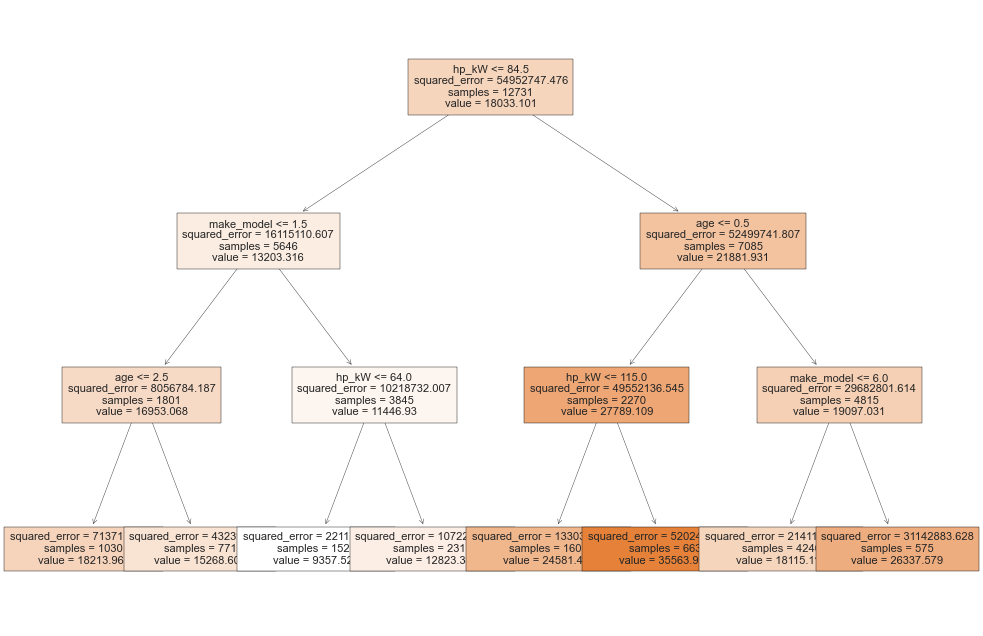

In [59]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(criterion='squared_error', max_depth=3, 
                                                                                   random_state=101))]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)


## GridSearch

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

In [62]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "DT_model__max_depth": [2, 3],
              "DT_model__min_samples_leaf": [1, 2, 3, 4],
              "DT_model__min_samples_split": [2, 3, 4],
              "DT_model__max_features":[4, 5, 6, None]}

In [63]:
grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [68]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(max_depth=3, criterion='absolute_error', 
                                                                                  random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10,
                       return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.iloc[:,2:]

# tüm metricleri görmek içinde CV yapabiliriz.
# CVdaki tüm iterasyonlara baktığımızda bazı skorların çok farklı olduğunu görebiliyoruz. Çok küçük datalarda beklenen
# bir durumdur.

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.694951,0.684030,-2731.138148,-2792.828489,-1.733368e+07,-1.729730e+07,-4163.374159,-4159.002550
2,0.704408,0.682278,-2786.575805,-2787.052452,-1.713363e+07,-1.735337e+07,-4139.278422,-4165.737772
3,0.695318,0.684115,-2710.706599,-2795.048787,-1.728214e+07,-1.729548e+07,-4157.179100,-4158.783670
4,0.624910,0.691489,-2890.933229,-2775.029237,-1.926463e+07,-1.707627e+07,-4389.148842,-4132.344872
5,0.665139,0.687434,-2844.894737,-2780.136062,-1.809223e+07,-1.720834e+07,-4253.496412,-4148.293564
6,0.688481,0.684910,-2861.120974,-2778.674638,-1.758307e+07,-1.726183e+07,-4193.216975,-4154.735601
7,0.700529,0.682885,-2846.027494,-2780.155437,-1.727221e+07,-1.733034e+07,-4155.985362,-4162.972647
8,0.727509,0.680690,-2666.751767,-2799.910106,-1.474270e+07,-1.757648e+07,-3839.622511,-4192.431791
9,0.654328,0.688164,-2848.637078,-2779.910543,-1.834520e+07,-1.719705e+07,-4283.129999,-4146.932715
10,0.682375,0.685131,-2712.798507,-2794.898673,-1.621710e+07,-1.743663e+07,-4027.046398,-4175.718732


In [69]:
df_scores.mean()[2:]

# ortalamalarına göre 

test_r2                              6.837948e-01
train_r2                             6.851127e-01
test_neg_mean_absolute_error        -2.789958e+03
train_neg_mean_absolute_error       -2.786364e+03
test_neg_mean_squared_error         -1.732666e+07
train_neg_mean_squared_error        -1.730331e+07
test_neg_root_mean_squared_error    -4.160148e+03
train_neg_root_mean_squared_error   -4.159695e+03
dtype: float64

Final Model

In [73]:
model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gearing_Type', 'make_model'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [74]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,6.852649e-01,6.886543e-01
mae,2.786595e+03,2.746141e+03
mse,1.729556e+07,1.637704e+07
rmse,4.158793e+03,4.046856e+03


In [77]:
X_train.head(1)

# pipeline içerisinde make_colum_transform kullanıldığından burdaki feture isimlerini kullanmıyoruz.

,age,hp_kW,km,Gearing_Type,make_model
15426,1.0,118.0,18035.130067,Automatic,Renault Espace


In [ ]:
import pickle
pickle.dump(model, open('DT_model','wb'))